# Checkpoint Five: Modeling Data

With your visualizations ready to go, the final step in your project is to do some predictive analysis on your dataset. You will be using linear regression for your model. You will not be penalized if your linear regression model does not work out. You just need to build the model and make notes as to the results.

Link to my dataset:

## Prepare Your Dataframe

Import any libraries you need and create a dataframe.

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

df = pd.read_csv('beer_reviews_cleaned_final.csv')

## Find Correlations

Use either pairplot or a heatmap or both to find the two variables with the strongest correlation in your dataset.

<AxesSubplot:>

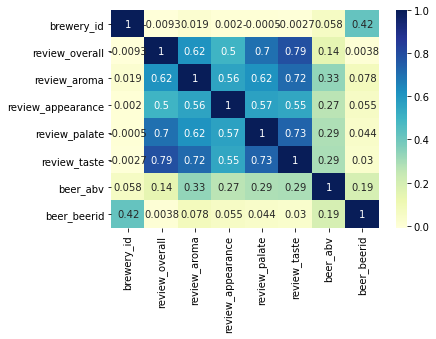

In [8]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
# Taste rating and overall rating have the highest correlation

## Create Your Model

Use the two columns with the strongest correlation to create and train your model. Make sure to print out the summary and plot the column values and the line produced by the model.

In [11]:
X = df['review_taste']
y = df['review_overall']

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

In [13]:
# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

In [14]:
# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

const           0.866188
review_taste    0.777530
dtype: float64

In [15]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         review_overall   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                 1.843e+06
Date:                Tue, 08 Mar 2022   Prob (F-statistic):               0.00
Time:                        12:59:10   Log-Likelihood:            -6.6864e+05
No. Observations:             1110375   AIC:                         1.337e+06
Df Residuals:                 1110373   BIC:                         1.337e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.8662      0.002    391.500      0.000       0.862       0.871
review_taste     0.7775      0.001   1357.673      0.000       0.776       0.779
==============================================================================
Omnibus:                    47355.756   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           144802.557
Skew:                          -0.136   Prob(JB):                         0.00
Kurtosis:                       4.748   Cond. No.                         21.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

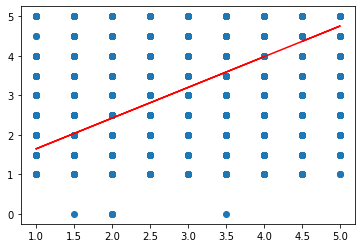

In [20]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 0.8662 + 0.7775*X_train, 'r')
plt.show()

## Error Terms

Finally, plot your error terms!

In [22]:
# Predicting y_value using traingn data of X
y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

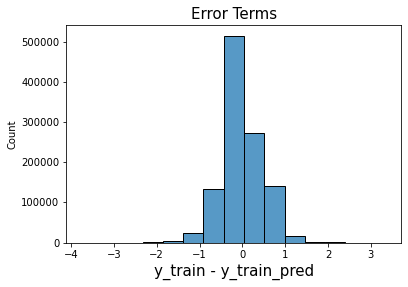

In [24]:
fig = plt.figure()
sns.histplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

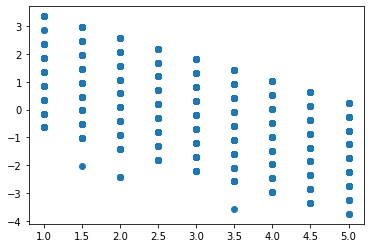

In [25]:
plt.scatter(X_train,res)
plt.show()

## Summarize Your Work

Make notes of your answers to the questions below.

1. What was your R-squared value? 0.624
2. Based on your results, do you think a linear regression model was the best type of predictive analysis for your dataset? Probably not. The residuals graph was not random and the historgram was close to normal but had a distintive skew.
3. Was your plot of the error terms a bell curve? Almost - it had a skew to the left.